C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32144\3293327577.py:15: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_path, sep=';', low_memory=False, na_values='?', infer_datetime_format=True,
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32144\3293327577.py:15: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file_path, sep=';', low_memory=False, na_values='?', infer_datetime_format=True,
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32144\3293327577.py:15: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or spec


Training LSTM...
Epoch 1/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 148s 6ms/step - loss: 7.3961e-04 - val_loss: 5.8717e-04
Epoch 2/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 314s 14ms/step - loss: 5.9536e-04 - val_loss: 5.5207e-04
Epoch 3/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 207s 9ms/step - loss: 5.9245e-04 - val_loss: 5.5707e-04
Epoch 4/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 147s 6ms/step - loss: 5.9181e-04 - val_loss: 5.4307e-04
Epoch 5/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 168s 7ms/step - loss: 5.7571e-04 - val_loss: 5.2944e-04
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step


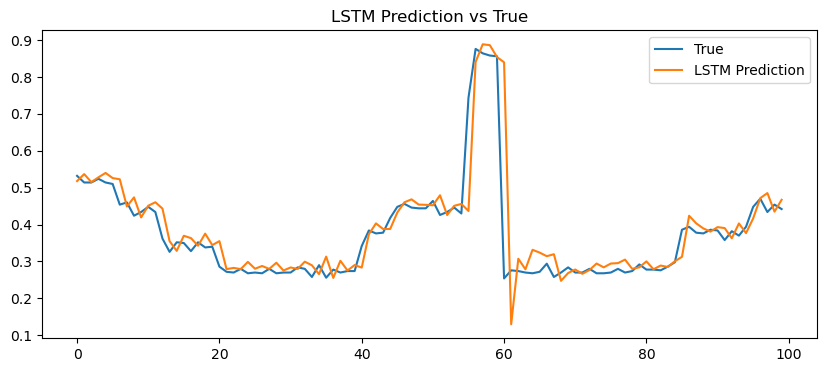


Training GRU...
Epoch 1/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 191s 8ms/step - loss: 6.8229e-04 - val_loss: 5.6233e-04
Epoch 2/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 171s 7ms/step - loss: 6.0737e-04 - val_loss: 5.6752e-04
Epoch 3/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 171s 7ms/step - loss: 5.8056e-04 - val_loss: 5.4285e-04
Epoch 4/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 169s 7ms/step - loss: 5.6393e-04 - val_loss: 5.4158e-04
Epoch 5/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 156s 7ms/step - loss: 5.5041e-04 - val_loss: 5.2194e-04
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step


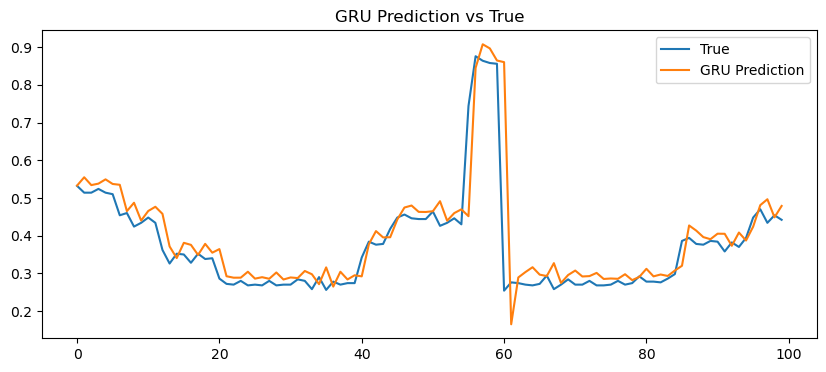


Training Transformer...
Epoch 1/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 275s 12ms/step - loss: 0.0585 - val_loss: 0.0105
Epoch 2/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 288s 12ms/step - loss: 0.0097 - val_loss: 0.0109
Epoch 3/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 294s 13ms/step - loss: 0.0097 - val_loss: 0.0105
Epoch 4/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 4144s 180ms/step - loss: 0.0097 - val_loss: 0.0105
Epoch 5/5
23055/23055 ━━━━━━━━━━━━━━━━━━━━ 245s 11ms/step - loss: 0.0097 - val_loss: 0.0107
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step


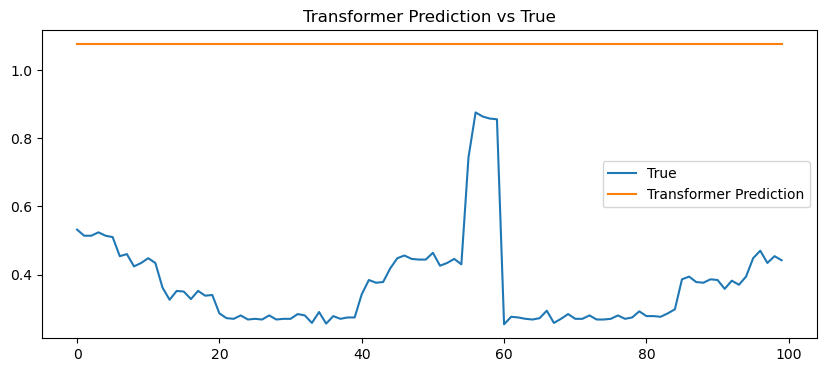

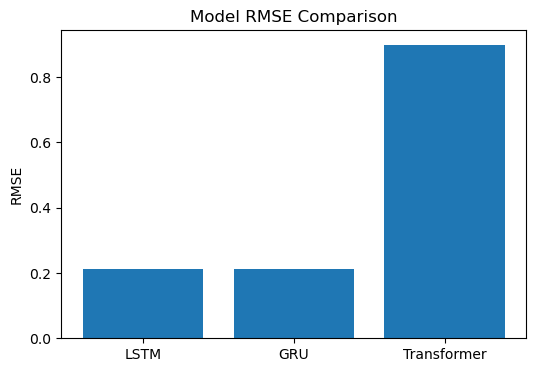

In [2]:

# 전력 수요 예측: LSTM / GRU / Transformer 모델 통합 예제

## 1. 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Input, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## 2. 데이터 로딩 및 전처리
def load_data(file_path, column='Global_active_power', train_ratio=0.8, sequence_length=24):
    df = pd.read_csv(file_path, sep=';', low_memory=False, na_values='?', infer_datetime_format=True,
                     parse_dates={'Datetime': ['Date', 'Time']}, index_col='Datetime')
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df[[column]].dropna()

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df)

    X, y = [], []
    for i in range(len(scaled) - sequence_length):
        X.append(scaled[i:i+sequence_length])
        y.append(scaled[i+sequence_length])

    X, y = np.array(X), np.array(y)
    split = int(len(X) * train_ratio)
    return X[:split], y[:split], X[split:], y[split:], scaler, df

## 3. 모델 정의 함수

def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def create_gru_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        GRU(64),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def create_transformer_model(input_shape, embed_dim=64, num_heads=2, ff_dim=64):
    inputs = Input(shape=input_shape)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(inputs)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

## 4. 평가 함수 정의
def evaluate_model(model, X_test, y_test, scaler, label):
    pred = model.predict(X_test)
    pred_rescaled = scaler.inverse_transform(pred)
    y_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_rescaled, pred_rescaled))

    plt.figure(figsize=(10, 4))
    plt.plot(y_rescaled[:100], label='True')
    plt.plot(pred_rescaled[:100], label=f'{label} Prediction')
    plt.title(f'{label} Prediction vs True')
    plt.legend()
    plt.show()

    return rmse

## 5. 실행 파트
file_path = 'household_power_consumption.txt'  # 로컬에 저장된 파일명
X_train, y_train, X_test, y_test, scaler, raw_df = load_data(file_path)

models = {
    'LSTM': create_lstm_model(X_train.shape[1:]),
    'GRU': create_gru_model(X_train.shape[1:]),
    'Transformer': create_transformer_model(X_train.shape[1:])
}

results = {}
for name, model in models.items():
    print(f'\nTraining {name}...')
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=1)
    rmse = evaluate_model(model, X_test, y_test, scaler, name)
    results[name] = rmse

## 6. 성능 비교
plt.figure(figsize=(6, 4))
plt.bar(results.keys(), results.values())
plt.title("Model RMSE Comparison")
plt.ylabel("RMSE")
plt.show()